In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 01 Preprocessing 

## 1-1 encoding

In [5]:
sex_mapping = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1-2 imputation

<Axes: >

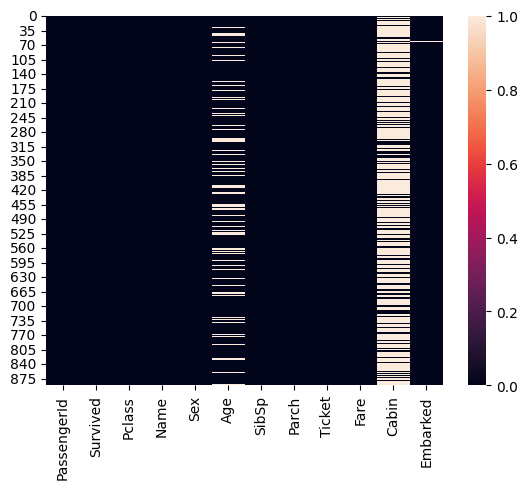

In [7]:
sns.heatmap(df.isnull())

### (1) 아예 없애기

In [8]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S


### (2) Median 값으로 채우기

<Axes: >

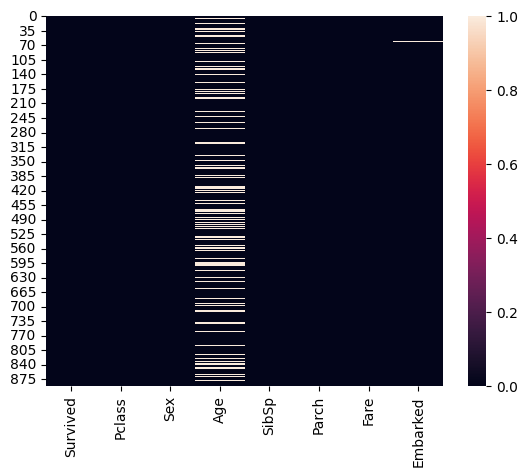

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['Age'].mode()[0]

24.0

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

In [12]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [13]:
df['Embarked'].mode()[0]

'S'

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [16]:
Embarked_mapping = {'Q':0, 'S':1, 'C':2}
df['Embarked'] = df['Embarked'].map(Embarked_mapping)

In [17]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1


## 1-3 outlier removal

### (1) skewness 확인

In [18]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
for col in df.columns:
    print('skewness of {0} is {1}'.format(col, df[col].skew()))

skewness of Survived is 0.4785234382949897
skewness of Pclass is -0.6305479068752845
skewness of Sex is 0.6189208484871982
skewness of Age is 0.6577529069911331
skewness of SibSp is 3.6953517271630565
skewness of Parch is 2.7491170471010933
skewness of Fare is 4.787316519674893
skewness of Embarked is 0.14733077297765435


### (2) visualization for fare

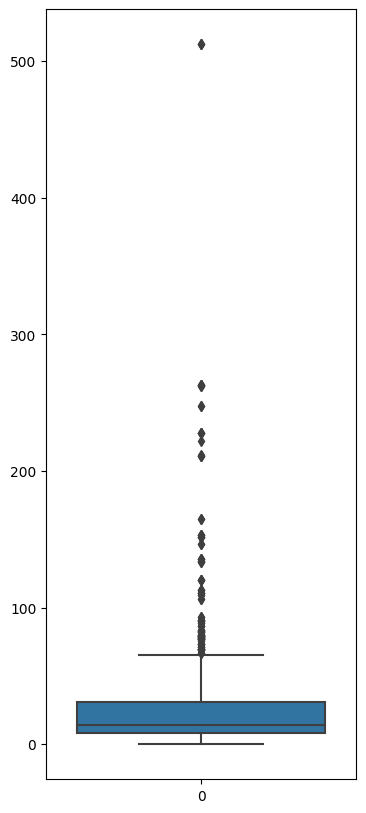

In [20]:
plt.figure(figsize=(4,10))
sns.boxplot(df['Fare'])
plt.show()

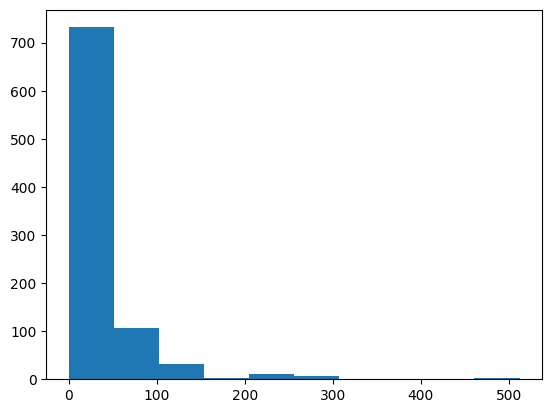

In [21]:
df['Fare'].hist(grid=False)
plt.show()

### (3) Outlier removal using quantile

In [22]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
whisker_width = 1.5
lower_whisker = Q1-whisker_width*IQR
upper_whisker = Q3+whisker_width*IQR

In [24]:
(df['Fare'] < lower_whisker) | (df['Fare'] > upper_whisker)

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [25]:
df[(df['Fare'] < lower_whisker) | (df['Fare'] > upper_whisker)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2
27,0,1,0,19.0,3,2,263.0000,1
31,1,1,1,24.0,1,0,146.5208,2
34,0,1,0,28.0,1,0,82.1708,2
52,1,1,1,49.0,1,0,76.7292,2
...,...,...,...,...,...,...,...,...
846,0,3,0,24.0,8,2,69.5500,1
849,1,1,1,24.0,1,0,89.1042,2
856,1,1,1,45.0,1,1,164.8667,1
863,0,3,1,24.0,8,2,69.5500,1


In [26]:
(df['Fare'] > lower_whisker) & (df['Fare'] < upper_whisker)

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 891, dtype: bool

In [27]:
df[(df['Fare'] > lower_whisker) & (df['Fare'] < upper_whisker)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1
887,1,1,1,19.0,0,0,30.0000,1
888,0,3,1,24.0,1,2,23.4500,1
889,1,1,0,26.0,0,0,30.0000,2


In [28]:
fare_no_outliers = df[(df['Fare'] > lower_whisker) & (df['Fare'] < upper_whisker)]

In [29]:
fare_no_outliers.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,0,22.0,1,0,7.2500,1
1,2,1,3,1,26.0,0,0,7.9250,1
2,3,1,1,1,35.0,1,0,53.1000,1
3,4,0,3,0,35.0,0,0,8.0500,1
4,5,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...,...
770,886,0,2,0,27.0,0,0,13.0000,1
771,887,1,1,1,19.0,0,0,30.0000,1
772,888,0,3,1,24.0,1,2,23.4500,1
773,889,1,1,0,26.0,0,0,30.0000,2


In [30]:
fare_no_outliers.reset_index().iloc[:, 1:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,3,1,26.0,0,0,7.9250,1
2,1,1,1,35.0,1,0,53.1000,1
3,0,3,0,35.0,0,0,8.0500,1
4,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
770,0,2,0,27.0,0,0,13.0000,1
771,1,1,1,19.0,0,0,30.0000,1
772,0,3,1,24.0,1,2,23.4500,1
773,1,1,0,26.0,0,0,30.0000,2


In [31]:
df = fare_no_outliers.reset_index().iloc[:, 1:]

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,3,1,26.0,0,0,7.9250,1
2,1,1,1,35.0,1,0,53.1000,1
3,0,3,0,35.0,0,0,8.0500,1
4,0,3,0,24.0,0,0,8.4583,0
...,...,...,...,...,...,...,...,...
770,0,2,0,27.0,0,0,13.0000,1
771,1,1,1,19.0,0,0,30.0000,1
772,0,3,1,24.0,1,2,23.4500,1
773,1,1,0,26.0,0,0,30.0000,2


## 1-4 Correlation Analysis

In [33]:
corr_mat = df.corr(method="pearson")
corr_mat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.238532,0.499888,-0.109055,-0.003156,0.098575,0.234422,0.050164
Pclass,-0.238532,1.000000,-0.011810,-0.361414,0.113943,0.083451,-0.589776,-0.209005
Sex,0.499888,-0.011810,1.000000,-0.120078,0.146035,0.289637,0.134106,-0.044510
Age,-0.109055,-0.361414,-0.120078,1.000000,-0.317365,-0.182881,0.100683,0.018809
SibSp,-0.003156,0.113943,0.146035,-0.317365,1.000000,0.410182,0.370388,-0.031784
Parch,0.098575,0.083451,0.289637,-0.182881,0.410182,1.000000,0.336844,0.050036
Fare,0.234422,-0.589776,0.134106,0.100683,0.370388,0.336844,1.000000,0.180028
Embarked,0.050164,-0.209005,-0.044510,0.018809,-0.031784,0.050036,0.180028,1.000000


In [37]:
corr_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.499888
Fare        0.234422
Parch       0.098575
Embarked    0.050164
SibSp      -0.003156
Age        -0.109055
Pclass     -0.238532
Name: Survived, dtype: float64

In [38]:
df.drop(['Embarked', 'SibSp'], axis = 1, inplace = True)

In [39]:
df

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,0,22.0,0,7.2500
1,1,3,1,26.0,0,7.9250
2,1,1,1,35.0,0,53.1000
3,0,3,0,35.0,0,8.0500
4,0,3,0,24.0,0,8.4583
...,...,...,...,...,...,...
770,0,2,0,27.0,0,13.0000
771,1,1,1,19.0,0,30.0000
772,0,3,1,24.0,2,23.4500
773,1,1,0,26.0,0,30.0000


# 1-5 Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [43]:
np.array(df['Fare']).reshape(-1, 1)

array([[ 7.25  ],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [ 8.4583],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708],
       [16.7   ],
       [26.55  ],
       [ 8.05  ],
       [31.275 ],
       [ 7.8542],
       [16.    ],
       [29.125 ],
       [13.    ],
       [18.    ],
       [ 7.225 ],
       [26.    ],
       [13.    ],
       [ 8.0292],
       [35.5   ],
       [21.075 ],
       [31.3875],
       [ 7.225 ],
       [ 7.8792],
       [ 7.8958],
       [27.7208],
       [ 7.75  ],
       [10.5   ],
       [52.    ],
       [ 7.2292],
       [ 8.05  ],
       [18.    ],
       [11.2417],
       [ 9.475 ],
       [21.    ],
       [ 7.8958],
       [41.5792],
       [ 7.8792],
       [ 8.05  ],
       [15.5   ],
       [ 7.75  ],
       [21.6792],
       [17.8   ],
       [39.6875],
       [ 7.8   ],
       [26.    ],
       [61.9792],
       [35.5   ],
       [10.5   ],
       [ 7.2292],
       [27.75  ],
       [46.9   ],
       [ 7

In [44]:
fare_array = np.array(df['Fare']).reshape(-1, 1)

In [48]:
df['Fare'] = pd.Series(scaler.fit_transform(fare_array).reshape(-1))

In [49]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,0,22.0,0,-0.779117
1,1,3,1,26.0,0,-0.729373
2,1,1,1,35.0,0,2.599828
3,0,3,0,35.0,0,-0.720161
4,0,3,0,24.0,0,-0.690071


In [50]:
features = df[['Pclass', 'Sex', 'Age', 'Parch', 'Fare']]
target = df['Survived']

In [51]:
features

,Pclass,Sex,Age,Parch,Fare
0,3,0,22.0,0,-0.779117
1,3,1,26.0,0,-0.729373
2,1,1,35.0,0,2.599828
3,3,0,35.0,0,-0.720161
4,3,0,24.0,0,-0.690071
...,...,...,...,...,...
770,2,0,27.0,0,-0.355367
771,1,1,19.0,0,0.897459
772,3,1,24.0,2,0.414752
773,1,0,26.0,0,0.897459


In [52]:
target

0      0
1      1
2      1
3      0
4      0
      ..
770    0
771    1
772    0
773    1
774    0
Name: Survived, Length: 775, dtype: int64